(720, 1280, 3)


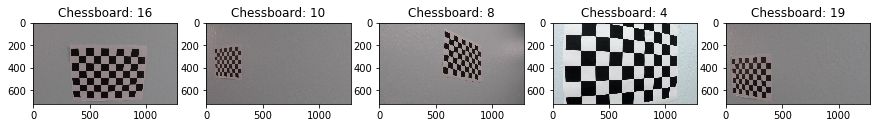

In [1]:
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
#import matplotlib.image as mpimg

# Visualizations will be shown in the notebook.
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 15]


chessboards = []
for i in range(1,21):
    file_name = 'camera_cal/calibration%s.jpg' % str(i)
    image = cv2.imread(file_name)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    chessboards.append(image)
    
print(chessboards[0].shape)
    
for i in range(0,5):
    index = random.randint(0, len(chessboards)-1)
    image = chessboards[index].squeeze() 
    plt.subplot(1,5,i+1)
    plt.imshow(image, cmap="gray")
    plt.title('Chessboard: %d' % index)

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
obj_points = np.zeros((6*9,3), np.float32)
obj_points[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)
#print(obj_points)    

object_points = [] # 3d points in real world space
image_points = [] # 2d points in image plane.

for i in range(0,len(chessboards)):
    ret, corners = cv2.findChessboardCorners(chessboards[i], (9,6), None)
    if ret == True:
        object_points.append(obj_points)
        image_points.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(chessboards[i], (9,6), corners, ret)
        write_name = 'corners/corners_found'+str(i)+'.jpg'
        cv2.imwrite(write_name, chessboards[i])
        #cv2.imshow('img', chessboards[i])
        #cv2.waitKey(500)

print(image_points[0].shape)

(54, 1, 2)


[[  1.15777818e+03   0.00000000e+00   6.67113857e+02]
 [  0.00000000e+00   1.15282217e+03   3.86124583e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
[[-0.24688507 -0.02373156 -0.00109831  0.00035107 -0.00259866]]


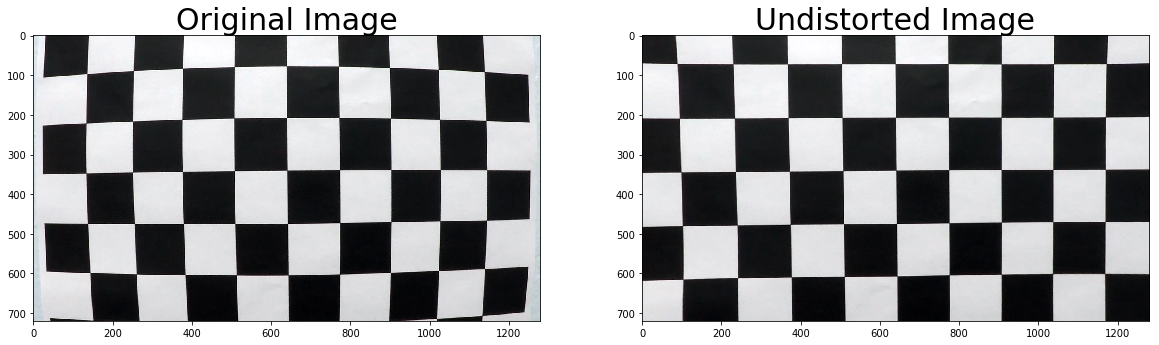

In [3]:

# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, img_size,None,None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
print(mtx)
print(dist)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_data/calibration_matrices.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

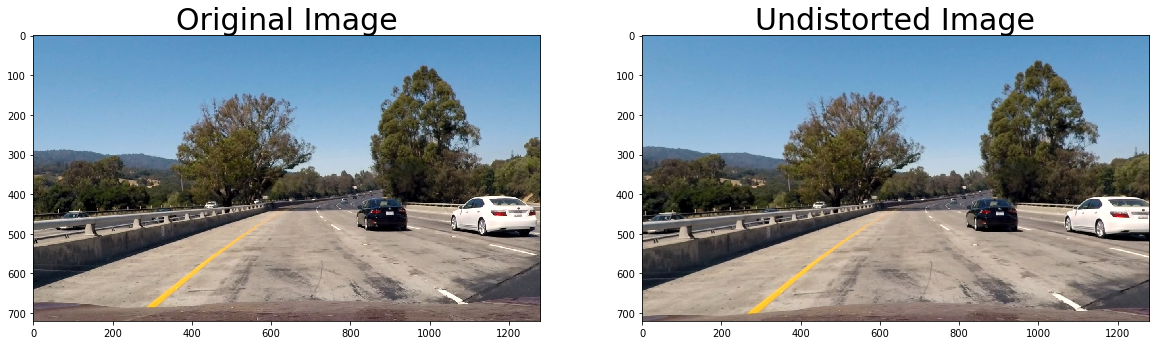

In [7]:
image = cv2.imread('test_images/test1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
u_image = cv2.undistort(image, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(u_image)
ax2.set_title('Undistorted Image', fontsize=30)

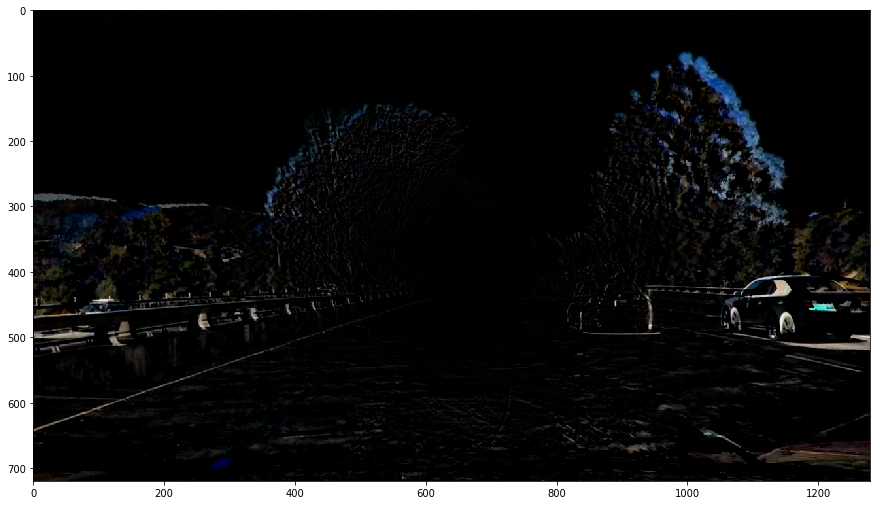

In [10]:
new_image = cv2.subtract(image,u_image)
plt.imshow(new_image, cmap="gray")